<a href="https://colab.research.google.com/github/SagarMeti5/Financial-Time-Series-Forecasting/blob/main/practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet


In [2]:
file_path = "/content/drive/MyDrive/stock_data/AAPL_2006-01-01_to_2018-01-01.csv"
df = pd.read_csv(file_path)

# Keep only Date & Close
df = df[['Date', 'Close']]
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (3019, 2)


,Date,Close
0,2006-01-03,10.68
1,2006-01-04,10.71
2,2006-01-05,10.63
3,2006-01-06,10.90
4,2006-01-09,10.86


In [3]:
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]


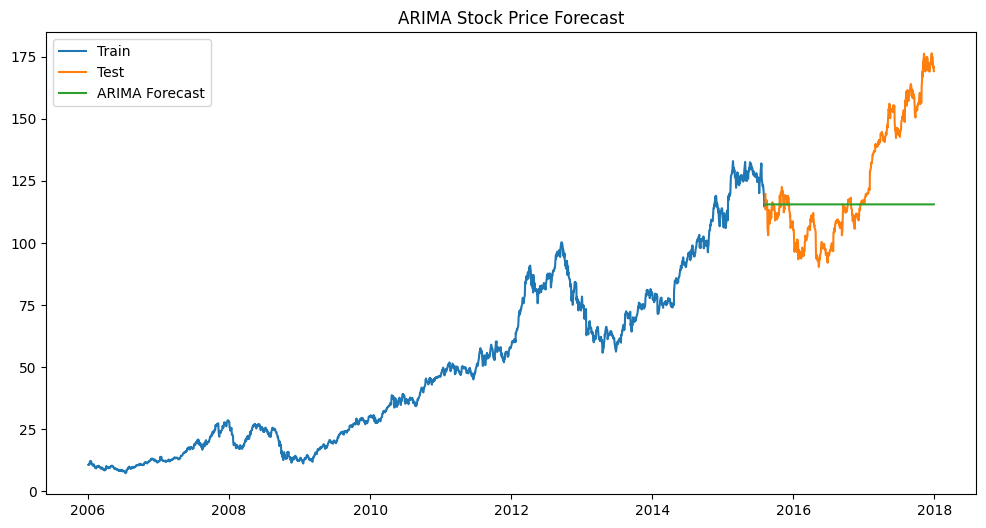

In [4]:
# Fit ARIMA model
model = ARIMA(train['Close'], order=(5,1,0))  # (p,d,q)
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))

# Plot ARIMA forecast
plt.figure(figsize=(12,6))
plt.plot(train['Date'], train['Close'], label='Train')
plt.plot(test['Date'], test['Close'], label='Test')
plt.plot(test['Date'], forecast, label='ARIMA Forecast')
plt.legend()
plt.title("ARIMA Stock Price Forecast")
plt.show()


DEBUG:cmdstanpy:input tempfile: /tmp/tmpizkr_a6w/__wpjkws.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpizkr_a6w/te3oli_z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=626', 'data', 'file=/tmp/tmpizkr_a6w/__wpjkws.json', 'init=/tmp/tmpizkr_a6w/te3oli_z.json', 'output', 'file=/tmp/tmpizkr_a6w/prophet_modelzkp811oy/prophet_model-20250928095926.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:59:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:59:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


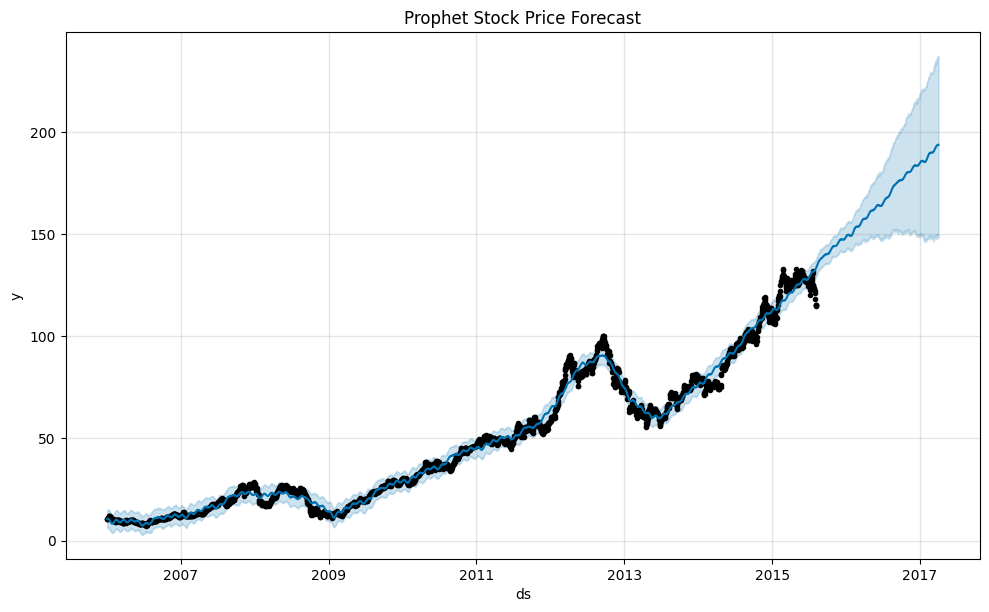

In [5]:
df_prophet = df.rename(columns={'Date':'ds','Close':'y'})

# Fit Prophet model
model_prophet = Prophet(daily_seasonality=True)
model_prophet.fit(df_prophet[:train_size])

# Make future dataframe
future = model_prophet.make_future_dataframe(periods=len(test))
forecast_prophet = model_prophet.predict(future)

# Plot Prophet forecast
fig1 = model_prophet.plot(forecast_prophet)
plt.title("Prophet Stock Price Forecast")
plt.show()


In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# ARIMA metrics
mse_arima = mean_squared_error(test['Close'], forecast)
mae_arima = mean_absolute_error(test['Close'], forecast)
rmse_arima = np.sqrt(mse_arima)

print("ARIMA RMSE:", rmse_arima)
print("ARIMA MAE:", mae_arima)

# Prophet metrics
forecast_prophet_test = forecast_prophet[-len(test):]
mse_prophet = mean_squared_error(test['Close'], forecast_prophet_test['yhat'])
mae_prophet = mean_absolute_error(test['Close'], forecast_prophet_test['yhat'])
rmse_prophet = np.sqrt(mse_prophet)

print("Prophet RMSE:", rmse_prophet)
print("Prophet MAE:", mae_prophet)


ARIMA RMSE: 25.98717626150704
ARIMA MAE: 19.834593006735947
Prophet RMSE: 40.95772286206052
Prophet MAE: 38.88130426681753
